In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/LAST_BLUE_Yellow_PINK_RUBY_WHITE_GREEN_Purple_Padpashcah_Dataset.csv")

# Drop all rows except those where 'type' is 'Ruby'
df_filtered = df[df["type"] == "Ruby"]

# Save the filtered dataset if needed
df_filtered.to_csv("filtered_dataset.csv", index=False)

# Display the first few rows of the filtered dataset
print(df_filtered.head())


<ipython-input-1-8ffe0e2ca399>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/LAST_BLUE_Yellow_PINK_RUBY_WHITE_GREEN_Purple_Padpashcah_Dataset.csv")


      image_name_helper   ns_id  type  total_price  carat  price_per_carat  \
10138            R13557  R13557  Ruby      12196.0   2.11           5780.0   
10139            R13345  R13345  Ruby       7900.0   1.22           6475.0   
10140            R13338  R13338  Ruby       3535.0   1.01           3500.0   
10141            R13375  R13375  Ruby       7393.0   1.11           6660.0   
10142            R12695  R12695  Ruby      13846.0   1.81           7650.0   

             color  shape  length  width  ...  R_Skewness R_Kurtosis  \
10138  Pinkish Red  Heart    7.21   8.35  ...    7.993461  63.928418   
10139  Pinkish Red  Round    7.01   6.92  ...    7.992676  63.920481   
10140          Red   Pear    8.29   5.47  ...    7.994872  63.944369   
10141          Red  Round    5.77   5.65  ...    7.995600  63.952317   
10142          Red  Round    7.42   7.35  ...    7.981501  63.798962   

         G_Mean  G_StdDev G_Skewness G_Kurtosis    B_Mean  B_StdDev  \
10138  0.003906  0.026587  

In [ ]:


import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = '/content/filtered_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path, dtype={'image_name_helper': str})


# Print the number of columns in the dataset
print(f"Number of columns in the dataset: {len(df.columns)}")

# Print all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)


irrelevant_columns = [
    'ns_id', 'total_price', 'carat', 'price_per_carat',
    'length', 'width', 'height', 'origin', 'image1', 'image2', 'image3'
]

# Drop irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Print the number of remaining columns in the DataFrame
print(f"Number of columns after dropping irrelevant ones: {len(df.columns)}")

# Print the remaining columns
print("Remaining columns in the DataFrame:", df.columns.tolist())

X = df.drop(columns=['color', 'clarity', 'cut'])  # Features (input variables)
y = df[['color', 'clarity', 'cut']]  # Target variables

# Save the dataset with target variables separated into a new CSV file
df_target_separated = pd.concat([X, y], axis=1)  # Combine the features and target variables
df_target_separated.to_csv('separated_target_variables.csv', index=False)  # Save to a new CSV file

In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('separated_target_variables.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")


In [ ]:

import pandas as pd
from sklearn.impute import SimpleImputer


data = pd.read_csv('separated_target_variables.csv', low_memory=False)


# Handling missing values in numerical columns by replacing them with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create an imputer for numerical columns (using median strategy)
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Handling missing values in categorical columns by replacing them with the mode
categorical_columns = data.select_dtypes(include=['object']).columns

# Create an imputer for categorical columns (using most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Optional: Check for any remaining missing values
missing_values = data.isnull().sum()

print("Missing values after imputation:\n", missing_values)

# Save the cleaned data to a new file if needed
data.to_csv('cleaned_dataset.csv', index=False)

Missing values after imputation:
 image_name_helper    0
type                 0
shape                0
color_intensity      0
treatment            0
                    ..
B_Skewness           0
B_Kurtosis           0
color                0
clarity              0
cut                  0
Length: 273, dtype: int64


In [ ]:
import pandas as pd

# Read CSV file
df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Identify continuous numerical columns
continuous_cols = [col for col in num_cols if df[col].nunique() > 20]  # Threshold of 20 unique values

print("Continuous Numerical Columns:", continuous_cols)

print("Number of Continuous Numerical Columns:", len(continuous_cols))

Continuous Numerical Columns: ['Avg Red', 'Avg Green', 'Avg Blue', 'Contrast', 'Homogeneity', 'Energy', 'Correlation', 'Edge_Density', 'Intensity_Variance', 'Hue_Std', 'Saturation_Std', 'Aspect_Ratio', 'Perimeter', 'Area', 'Circularity', 'Convexity', 'Edge_Sharpness', 'Symmetry', 'R Hist Bin Agg 0', 'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5', 'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10', 'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15', 'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20', 'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25', 'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30', 'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file
df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path

# Step 2: Select only continuous numerical columns
# Continuous columns usually have float data types
continuous_num_cols = df.select_dtypes(include=['float64', 'float32']).columns

# Step 3: Function to detect outliers using the IQR method (Only for continuous numerical columns)
def detect_outliers_iqr(data, columns, threshold=1.5):
    outliers_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

        # Store outliers if found
        if not outliers.empty:
            outliers_dict[col] = outliers

    return outliers_dict

# Step 4: Detect outliers in the dataset (only for continuous numerical columns)
outliers = detect_outliers_iqr(df, continuous_num_cols)

# Step 5: Replace outliers with the median value
def replace_outliers_with_median(data, outliers_dict):
    for col, outlier_values in outliers_dict.items():
        median_value = data[col].median()
        # Replace outliers with the median value
        data[col] = np.where(data[col].isin(outlier_values), median_value, data[col])
    return data

# Replace outliers with the median value (only for continuous numerical columns)
df_cleaned = replace_outliers_with_median(df.copy(), outliers)

# Step 6: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("/content/cleaned_dataset_no_outliers.csv", index=False)

# Step 7: Check if any outliers remain in the cleaned dataset
outliers_after_cleaning = detect_outliers_iqr(df_cleaned, continuous_num_cols)

# Print results
if not outliers_after_cleaning:
    print("No outliers found in the cleaned dataset.")
else:
    for col, outlier_values in outliers_after_cleaning.items():
        print(f"Outliers still present in {col}:")
        print(outlier_values)
        print("\n")


In [ ]:
# Check for duplicates based on specific columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the duplicate rows
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
duplicate_rows

Total duplicate rows based on selected columns: 0


,image_name_helper,type,shape,color_intensity,treatment,color_group,color_group_blue,color_group_blue-grey,color_group_blue-purple,color_group_brown-pink,...,G_StdDev,G_Skewness,G_Kurtosis,B_Mean,B_StdDev,B_Skewness,B_Kurtosis,color,clarity,cut


In [ ]:
!pip install imbalanced-learn


<ipython-input-9-556093568d94>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y1, palette="viridis")
<ipython-input-9-556093568d94>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y2, palette="viridis")
<ipython-input-9-556093568d94>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y3, palette="viridis")


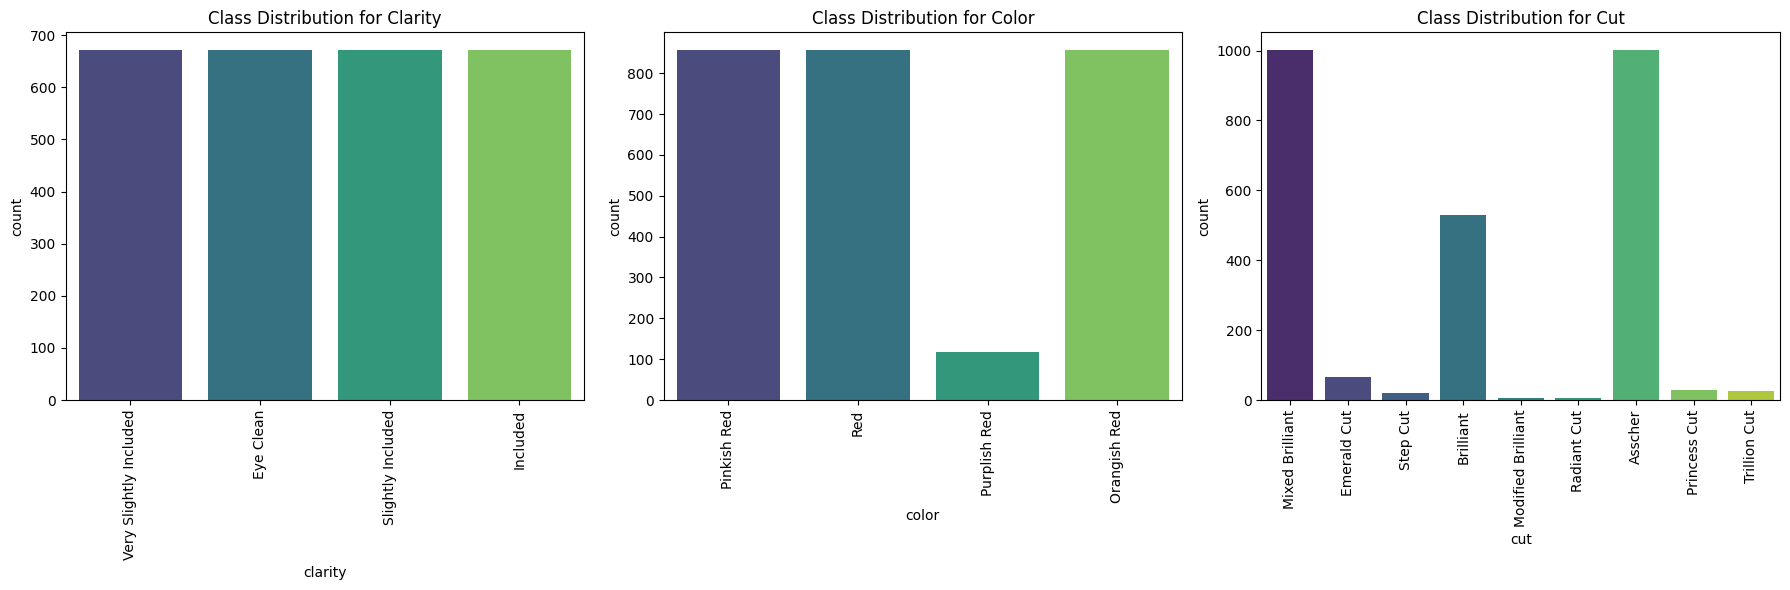

Dataset after resampling has been saved as 'resampled_dataset.csv'


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the preprocessed dataset
data = pd.read_csv('/content/cleaned_dataset_no_outliers.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Features (without target variables)
y = data[['clarity', 'color', 'cut']]  # Target variables

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample each target variable separately
X_resampled_clarity, y_resampled_clarity = ros.fit_resample(X, y['clarity'])
X_resampled_color, y_resampled_color = ros.fit_resample(X, y['color'])
X_resampled_cut, y_resampled_cut = ros.fit_resample(X, y['cut'])

# Combine the resampled target variables into a DataFrame
y_resampled = pd.DataFrame({
    'clarity': y_resampled_clarity,
    'color': y_resampled_color,
    'cut': y_resampled_cut
})

# Ensure that all resampled datasets have the same number of rows
min_length = min(len(y_resampled_clarity), len(y_resampled_color), len(y_resampled_cut))

X_resampled_final = X_resampled_clarity.iloc[:min_length]
y_resampled_final = y_resampled.iloc[:min_length]

# Step 2: Plot class distributions
def plot_class_distribution(y1, y2, y3):
    plt.figure(figsize=(18, 6))  # Set a large figure size for side-by-side plots

    # Plot clarity distribution
    plt.subplot(1, 3, 1)  # (rows, columns, plot number)
    sns.countplot(x=y1, palette="viridis")
    plt.title("Class Distribution for Clarity")
    plt.xticks(rotation=90)

    # Plot color distribution
    plt.subplot(1, 3, 2)
    sns.countplot(x=y2, palette="viridis")
    plt.title("Class Distribution for Color")
    plt.xticks(rotation=90)

    # Plot cut distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x=y3, palette="viridis")
    plt.title("Class Distribution for Cut")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Plot distributions for resampled target variables
plot_class_distribution(y_resampled_final['clarity'], y_resampled_final['color'], y_resampled_final['cut'])

# Step 3: Save the resampled dataset
final_resampled_data = pd.concat([X_resampled_final, y_resampled_final], axis=1)
final_resampled_data.to_csv('resampled_dataset.csv', index=False)

print("Dataset after resampling has been saved as 'resampled_dataset.csv'")

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
import json

# Step 1: Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Step 2: Read the resampled CSV file (after RandomOverSampler)
data = pd.read_csv('resampled_dataset.csv', low_memory=False)  # Replace with your actual dataset path

# Step 3: Handle missing values for features before encoding
# Select columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values for numerical columns (using the mean)
numerical_cols = data[missing_columns].select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns (using the mode)
categorical_cols = data[missing_columns].select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation (before encoding):\n", missing_values_after_imputation)

# Step 4: Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Assuming 'clarity', 'color', 'cut' are the target columns
y = data[['clarity', 'color', 'cut']]  # The target variables

# Step 5: Handle missing values for target columns (impute with 'Unknown')
y.loc[:, 'clarity'] = y['clarity'].fillna('Unknown')
y.loc[:, 'color'] = y['color'].fillna('Unknown')
y.loc[:, 'cut'] = y['cut'].fillna('Unknown')

# Step 6: Encode categorical columns in X (features) using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the feature set (X)
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Step 7: Encode the target variables (clarity, color, cut) using LabelEncoder
label_mappings = {}  # Dictionary to store mappings

for target in ['clarity', 'color', 'cut']:
    le = LabelEncoder()
    y.loc[:, target] = le.fit_transform(y[target])
    label_mappings[target] = {index: label for index, label in enumerate(le.classes_)}  # Store target mappings

# Step 8: Save label mappings for target columns to a JSON file
with open('target_label_mappings.json', 'w') as f:
    json.dump(label_mappings, f)

print("\nTarget label mappings saved to 'target_label_mappings.json'")

# Step 9: Check for missing values in the encoded data (features and target)
missing_values_after_encoding = pd.concat([X, y], axis=1).isnull().sum()
print("\nMissing values after encoding:\n", missing_values_after_encoding)

# Step 10: Handle missing values after encoding (if any)
# For numerical columns (in features)
numerical_cols_encoded = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols_encoded] = X[numerical_cols_encoded].fillna(X[numerical_cols_encoded].mean())

# For categorical columns (in features)
categorical_cols_encoded = X.select_dtypes(include=['object']).columns
for col in categorical_cols_encoded:
    X[col] = X[col].fillna(X[col].mode()[0])

# Step 11: Combine the encoded features and target variables back into a single DataFrame
encoded_data = pd.concat([X, y], axis=1)

# Step 12: Save the encoded data to a new CSV file
encoded_data.to_csv('encoded_resampled_dataset.csv', index=False)

print("\nEncoded data saved to 'encoded_resampled_dataset.csv'")


Missing values after imputation (before encoding):
 image_name_helper    0
type                 0
shape                0
color_intensity      0
treatment            0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 273, dtype: int64

Target label mappings saved to 'target_label_mappings.json'

Missing values after encoding:
 image_name_helper    0
type                 0
shape                0
color_intensity      0
treatment            0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 273, dtype: int64

Encoded data saved to 'encoded_resampled_dataset.csv'


In [ ]:
import pandas as pd

# Step 1: Read the encoded CSV file
encoded_data = pd.read_csv('encoded_resampled_dataset.csv')  # Replace with your actual dataset path

# Step 2: Check the class distribution (balance) for 'clarity', 'color', and 'cut'
print("Class Distribution (Counts) after encoding and preprocessing:")

# For Clarity
print("Clarity:\n", encoded_data['clarity'].value_counts(), "\n")

# For Color
print("Color:\n", encoded_data['color'].value_counts(), "\n")

# For Cut
print("Cut:\n", encoded_data['cut'].value_counts(), "\n")

Class Distribution (Counts) after encoding and preprocessing:
Clarity:
 clarity
3    672
0    672
2    672
1    672
Name: count, dtype: int64 

Color:
 color
1    857
3    857
0    857
2    117
Name: count, dtype: int64 

Cut:
 cut
3    1002
0    1002
1     529
2      67
5      30
8      27
7      20
6       6
4       5
Name: count, dtype: int64 



In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Step 1: Read the CSV file into a DataFrame
data = pd.read_csv('encoded_resampled_dataset.csv')

# Step 2: Initialize the MultiLabelBinarizer
mlb_clarity = MultiLabelBinarizer()
mlb_color = MultiLabelBinarizer()
mlb_cut = MultiLabelBinarizer()

# Step 3: Convert clarity, color, and cut columns into binary format
# Applying MultiLabelBinarizer for each of the labels separately
Y_clarity = mlb_clarity.fit_transform(data['clarity'].apply(lambda x: [x]))
Y_color = mlb_color.fit_transform(data['color'].apply(lambda x: [x]))
Y_cut = mlb_cut.fit_transform(data['cut'].apply(lambda x: [x]))

# Step 4: Combine these into a new DataFrame for multi-label classification
Y_clarity_df = pd.DataFrame(Y_clarity, columns=[f'clarity_{i}' for i in mlb_clarity.classes_])
Y_color_df = pd.DataFrame(Y_color, columns=[f'color_{i}' for i in mlb_color.classes_])
Y_cut_df = pd.DataFrame(Y_cut, columns=[f'cut_{i}' for i in mlb_cut.classes_])

# Step 5: Concatenate the newly created one-hot encoded columns with the original DataFrame
# Drop original columns that are being transformed (clarity, color, cut)
data_final = pd.concat([data.drop(columns=['clarity', 'color', 'cut']), Y_clarity_df, Y_color_df, Y_cut_df], axis=1)

# Step 6: Save the final DataFrame to a CSV file
data_final.to_csv('processed_data.csv', index=False)

# Step 7: Print the final DataFrame to check the result
print(data_final.head())

   image_name_helper  type  shape  color_intensity  treatment  color_group  \
0                588     0      3                3          1            0   
1                469     0      9                1          0            0   
2                467     0      6                3          1            2   
3                486     0      9                3          1            2   
4                202     0      9                3          0            2   

   color_group_blue  color_group_blue-grey  color_group_blue-purple  \
0               0.0                    0.0                      0.0   
1               0.0                    0.0                      0.0   
2               0.0                    0.0                      0.0   
3               0.0                    0.0                      0.0   
4               0.0                    0.0                      0.0   

   color_group_brown-pink  ...  color_3  cut_0  cut_1  cut_2  cut_3  cut_4  \
0                     0.0 

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
data = pd.read_csv('processed_data.csv')  # Replace 'your_data.csv' with the actual path to your CSV file

# Step 2: Check the columns before transformation (original categorical columns)
print("Original Columns Before Transformation:")
print(data.columns)

# Step 3: Check the first few rows before transformation
print("\nFirst Few Rows Before Transformation:")
print(data.head())

# Step 4: Check if the original categorical columns are dropped and only one-hot encoded columns remain
# Here we'll check the columns related to clarity, color, and cut to make sure they have been encoded properly
print("\nChecking for One-Hot Encoded Columns for 'clarity', 'color', 'cut':")

clarity_columns = [col for col in data.columns if 'clarity' in col]  # Find columns related to 'clarity'
color_columns = [col for col in data.columns if 'color' in col]  # Find columns related to 'color'
cut_columns = [col for col in data.columns if 'cut' in col]  # Find columns related to 'cut'

print("\nClarity One-Hot Encoded Columns:")
print(clarity_columns)

print("\nColor One-Hot Encoded Columns:")
print(color_columns)

print("\nCut One-Hot Encoded Columns:")
print(cut_columns)

# Step 5: Ensure original categorical columns are dropped
print("\nChecking if Original Categorical Columns ('clarity', 'color', 'cut') are Dropped:")
original_categorical_columns = ['clarity', 'color', 'cut']  # List of original categorical columns

# Check if any of the original categorical columns remain
remaining_columns = [col for col in original_categorical_columns if col in data.columns]
print("Remaining Original Columns (if any):", remaining_columns)

# Step 6: Verify the final DataFrame's structure and first few rows after transformation
print("\nFirst Few Rows After Transformation:")
print(data.head())

# If everything is correct, you can save the transformed DataFrame
data.to_csv('Final_processed_data.csv', index=False)

Original Columns Before Transformation:
Index(['image_name_helper', 'type', 'shape', 'color_intensity', 'treatment',
       'color_group', 'color_group_blue', 'color_group_blue-grey',
       'color_group_blue-purple', 'color_group_brown-pink',
       ...
       'color_3', 'cut_0', 'cut_1', 'cut_2', 'cut_3', 'cut_4', 'cut_5',
       'cut_6', 'cut_7', 'cut_8'],
      dtype='object', length=287)

First Few Rows Before Transformation:
   image_name_helper  type  shape  color_intensity  treatment  color_group  \
0                588     0      3                3          1            0   
1                469     0      9                1          0            0   
2                467     0      6                3          1            2   
3                486     0      9                3          1            2   
4                202     0      9                3          0            2   

   color_group_blue  color_group_blue-grey  color_group_blue-purple  \
0               0.0      

# Train Random Forest Model

In [ ]:

import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Step 1: Load dataset
df = pd.read_csv('Final_processed_data.csv')

# Define target labels
labels_columns = ['clarity_0', 'clarity_1', 'clarity_2', 'clarity_3',
                   'color_0', 'color_1', 'color_2', 'color_3',
                    'cut_0', 'cut_1', 'cut_2', 'cut_3', 'cut_4', 'cut_5', 'cut_6', 'cut_7', 'cut_8']

# Features and target
X = df.drop(columns=labels_columns)
Y = df[labels_columns]

# Step 2: Train-Validation-Test Split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Step 3: Handle Class Imbalance with Oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

Y_train_resampled_df = pd.DataFrame(columns=labels_columns)
X_train_resampled_df = pd.DataFrame()

for i, label in enumerate(labels_columns):
    X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train[label])
    if i == 0:
        X_train_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
    Y_train_resampled_df[label] = Y_resampled

# ✅ Handle Missing Values After Resampling
X_train_resampled_df.fillna(0, inplace=True)
Y_train_resampled_df.fillna(0, inplace=True)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled_df)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply PCA (Retain 90% Variance)
pca = PCA(n_components=0.90, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 6: Compute Sample Weights
sample_weights = compute_sample_weight('balanced', Y_train_resampled_df)

# Step 7: Hyperparameter Tuning (for RandomForestClassifier)
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Step 8: Multi-output Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Step 9: Wrap in MultiOutputClassifier
multi_target_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Step 10: Random search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=multi_target_rf.estimator,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   scoring='f1_weighted',
                                   cv=2,
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=1)

# Step 11: Fit the model with sample weights
random_search.fit(X_train_pca, Y_train_resampled_df, sample_weight=sample_weights)

# Step 12: Predictions
Y_train_pred = random_search.predict(X_train_pca)
Y_val_pred = random_search.predict(X_val_pca)
Y_test_pred = random_search.predict(X_test_pca)

# Step 13: Compute Metrics for Training Set
precision_train = precision_score(Y_train_resampled_df, Y_train_pred, average='weighted')
recall_train = recall_score(Y_train_resampled_df, Y_train_pred, average='weighted')
accuracy_train = accuracy_score(Y_train_resampled_df, Y_train_pred)
f1_train = f1_score(Y_train_resampled_df, Y_train_pred, average='weighted')

# Step 14: Compute Metrics for Validation Set
precision_val = precision_score(Y_val, Y_val_pred, average='weighted')
recall_val = recall_score(Y_val, Y_val_pred, average='weighted')
accuracy_val = accuracy_score(Y_val, Y_val_pred)
f1_val = f1_score(Y_val, Y_val_pred, average='weighted')

# Step 15: Compute Metrics for Test Set
precision_test = precision_score(Y_test, Y_test_pred, average='weighted')
recall_test = recall_score(Y_test, Y_test_pred, average='weighted')
accuracy_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')

# Step 16: Print the Metrics for Train, Validation, and Test Sets
print("Train Metrics:")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")

print("\nValidation Metrics:")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")

print("\nTest Metrics:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Train Metrics:
Precision: 0.7168
Recall: 0.9644
Accuracy: 0.6000
F1 Score: 0.8200

Validation Metrics:
Precision: 0.5709
Recall: 0.7955
Accuracy: 0.3606
F1 Score: 0.6500

Test Metrics:
Precision: 0.5793
Recall: 0.8030
Accuracy: 0.3810
F1 Score: 0.6617


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
